# Exploratory Data Analysis of Cancer Genomics data using TCGA

In this notebook, we will take a look at one of the canonical datasets, if not _the_ dataset, in cancer genomics: TCGA.

We'll start with investigating the RNA Sequencing (rnaseq) and Clinical data available for a type of liver cancer known as hepatocellular carcinoma (HCC). Hepatocellular carcinoma is the most common form of liver cancer in the United States, making up [more than 80% of cases](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga/studied-cancers/liver). The TCGA dataset is abbreviated LIHC.

Some examples of what researchers have learned from the LIHC dataset at the DNA-level include confirmed [frequent mutations](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga/studied-cancers/liver) in:
 - The TERT promotor region, associated with regulating cell survival
 - TP53, one of the most frequently mutated genes in cancer
 - CTNNB1, a member of the Wnt signaling pathway that mediates cell growth and differentiation
     
There are currently several therapies under development that target these genes.

In addition to DNA alterations however, different biological and tumor microenvrionment factors can [influence disease progression](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6237857/). A transcriptomic survey of tissues at various stages of disease progression could help elucidate some of the underlying pathways contributing to tumorigenesis.   

### Today, we'll be focusing on using RNA-seq data from LIHC combined with clinical attributes to identify biomarkers for disease progression. 
 
The data is stored in the R package _[RTCGA](http://rtcga.github.io/RTCGA/)_

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Set variables

In [2]:
data_dir=""
response_name="patient.race"
rnaseq_file=data_dir+"lihc_rnaseq.csv.gz"
clinical_file=data_dir+"lihc_clinical.csv.gz"

## Load data

The data is stored in the RTCGA package in the R programming language. I've outputted it for easy use within python. 

We will be investigating the Hepatocellular carcinoma dataset. Read about it [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5680778/).

The TCGA RNASeq data is illumina hiseq Level 3 RSEM normalized expression data. You can read about thec RSEM method [here](https://academic.oup.com/bioinformatics/article/26/4/493/243395).

Essentially this is the raw counts of reads that aligned to the gene transcript, though it's only a guess by the program. Since it's a guess, the values are rational numbers. To simplify things, we'll round the values to the next whole integer. 

We will be using clinical data from the [GDC Data portal](https://portal.gdc.cancer.gov/projects/TCGA-LIHC).

In [3]:
rnaseq = (pd.
          read_csv(rnaseq_file,compression="gzip").
          set_index('bcr_patient_barcode').
          applymap(lambda x : int(np.ceil(x)))
         )
display(rnaseq.shape)
display(rnaseq.head())

(423, 20531)

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01A-11R-A37K-07,0,2,4,91,1018,0,142,1,0,0,...,25,274,795,19,500,3173,891,511,4,7
TCGA-2Y-A9GS-01A-12R-A38B-07,0,27,3,72,640,0,123,2,0,0,...,69,633,1154,72,1001,5302,756,861,7,483
TCGA-2Y-A9GT-01A-11R-A38B-07,0,0,5,96,743,0,96,2,1,0,...,47,1220,1134,13,1290,3220,861,524,15,84
TCGA-2Y-A9GU-01A-11R-A38B-07,0,6,6,62,1187,0,281,1,0,0,...,19,286,1151,10,942,3093,1340,344,3,3
TCGA-2Y-A9GV-01A-11R-A38B-07,0,12,6,105,879,0,283,0,0,0,...,42,1000,1632,5,1381,2903,576,666,3,120


In [4]:
gene_name_logical = [len(x[0])>1 for x in rnaseq.columns.str.split('|')]
sub = rnaseq.loc[:,gene_name_logical]
sub.columns = [x[0] for x in sub.columns.str.split('|')]
rnaseq_sub = sub.copy()
rnaseq_sub.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01A-11R-A37K-07,22283,584,0,375,0,286320,81,543,1,1032,...,25,274,795,19,500,3173,891,511,4,7
TCGA-2Y-A9GS-01A-12R-A38B-07,22642,1573,3,99,0,31169,163,2,1,903,...,69,633,1154,72,1001,5302,756,861,7,483
TCGA-2Y-A9GT-01A-11R-A38B-07,77670,1281,0,215,1,19515,119,1,3,773,...,47,1220,1134,13,1290,3220,861,524,15,84
TCGA-2Y-A9GU-01A-11R-A38B-07,9323,1253,0,2914,2,243941,72,0,0,722,...,19,286,1151,10,942,3093,1340,344,3,3
TCGA-2Y-A9GV-01A-11R-A38B-07,84243,1641,0,404,0,8756,83,0,9,828,...,42,1000,1632,5,1381,2903,576,666,3,120


The clinical data is within the RTCGA package, but is also available [here](https://portal.gdc.cancer.gov/projects/TCGA-LIHC). More cdescription of the clinical attributes are [here](https://gdc.cancer.gov/about-data/data-harmonization-and-generation/clinical-data-harmonization).

In [5]:
clinical = pd.read_csv('clinical.tsv', sep='\t')
clinical['submitter_id'] = clinical['submitter_id'].map(lambda x: x.lower())
clinical.head()

,case_id,submitter_id,project_id,gender,year_of_birth,race,days_to_birth,ethnicity,vital_status,days_to_death,...,treatment_effect,initial_disease_status,treatment_type,therapeutic_agents,regimen_or_line_of_therapy,treatment_intent_type,treatment_anatomic_site,treatment_outcome,days_to_treatment_end,treatment_or_therapy
0,bce25281-502e-4599-9679-32dc8462ffb1,tcga-dd-a4ne,TCGA-LIHC,female,1936,white,-27549,hispanic or latino,Dead,660,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
1,654af137-70d9-4ee4-9f69-793e352d30f8,tcga-dd-a1ee,TCGA-LIHC,male,1933,white,-26858,not hispanic or latino,Dead,349,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
2,45f00f00-d793-4dca-aeb9-7626d4575c90,tcga-gj-a9db,TCGA-LIHC,male,1945,white,-25020,not hispanic or latino,Dead,67,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
3,496beef9-80d9-4734-a23d-334ae1b6aaab,tcga-dd-aac8,TCGA-LIHC,male,1936,asian,-26322,not hispanic or latino,Dead,16,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
4,d1aa9c1a-d732-48c0-b669-8a14e0397344,tcga-2y-a9gv,TCGA-LIHC,female,1953,white,-20011,not hispanic or latino,Dead,2532,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,yes


In [6]:
rnaseq_sub.index = rnaseq_sub.index.map(lambda x: '-'.join(x.split('-')[:3]).lower())
rnaseq_sub.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
tcga-2v-a95s,22283,584,0,375,0,286320,81,543,1,1032,...,25,274,795,19,500,3173,891,511,4,7
tcga-2y-a9gs,22642,1573,3,99,0,31169,163,2,1,903,...,69,633,1154,72,1001,5302,756,861,7,483
tcga-2y-a9gt,77670,1281,0,215,1,19515,119,1,3,773,...,47,1220,1134,13,1290,3220,861,524,15,84
tcga-2y-a9gu,9323,1253,0,2914,2,243941,72,0,0,722,...,19,286,1151,10,942,3093,1340,344,3,3
tcga-2y-a9gv,84243,1641,0,404,0,8756,83,0,9,828,...,42,1000,1632,5,1381,2903,576,666,3,120


In [7]:
rnaseq_sub.reset_index()

,bcr_patient_barcode,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,tcga-2v-a95s,22283,584,0,375,0,286320,81,543,1,...,25,274,795,19,500,3173,891,511,4,7
1,tcga-2y-a9gs,22642,1573,3,99,0,31169,163,2,1,...,69,633,1154,72,1001,5302,756,861,7,483
2,tcga-2y-a9gt,77670,1281,0,215,1,19515,119,1,3,...,47,1220,1134,13,1290,3220,861,524,15,84
3,tcga-2y-a9gu,9323,1253,0,2914,2,243941,72,0,0,...,19,286,1151,10,942,3093,1340,344,3,3
4,tcga-2y-a9gv,84243,1641,0,404,0,8756,83,0,9,...,42,1000,1632,5,1381,2903,576,666,3,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,tcga-zs-a9cd,66433,1296,0,259,0,72358,641,0,0,...,31,1254,774,8,1239,4029,636,435,7,197
419,tcga-zs-a9ce,159666,2266,2,498,0,19481,39,0,2,...,34,249,976,29,883,4042,492,578,0,125
420,tcga-zs-a9cf,14369,1577,0,322,1,29739,408,1,20,...,56,1333,1459,56,1258,1173,432,837,3,125
421,tcga-zs-a9cf,6034,1552,0,380,2,37332,76,2,15,...,47,901,1222,112,1218,612,894,925,4,60


In [8]:
full_df = pd.merge(rnaseq_sub.reset_index(), clinical[['submitter_id','tumor_stage']], left_on='bcr_patient_barcode', right_on='submitter_id', how='inner') \
    .set_index('bcr_patient_barcode') \
    .drop('submitter_id', axis=1)
full_df.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,tumor_stage
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
tcga-2v-a95s,22283,584,0,375,0,286320,81,543,1,1032,...,274,795,19,500,3173,891,511,4,7,8170/3
tcga-2y-a9gs,22642,1573,3,99,0,31169,163,2,1,903,...,633,1154,72,1001,5302,756,861,7,483,not reported
tcga-2y-a9gt,77670,1281,0,215,1,19515,119,1,3,773,...,1220,1134,13,1290,3220,861,524,15,84,stage i
tcga-2y-a9gu,9323,1253,0,2914,2,243941,72,0,0,722,...,286,1151,10,942,3093,1340,344,3,3,20187
tcga-2y-a9gv,84243,1641,0,404,0,8756,83,0,9,828,...,1000,1632,5,1381,2903,576,666,3,120,stage i


(array([248.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([ 1. ,  5.2,  9.4, 13.6, 17.8, 22. , 26.2, 30.4, 34.6, 38.8, 43. ]),
 <a list of 10 Patch objects>)

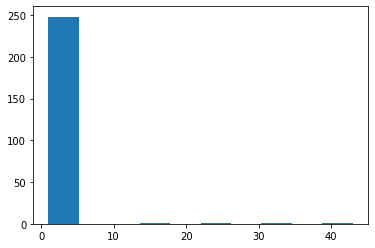

In [9]:
tumor_stages = clinical['tumor_stage'].value_counts()
plt.hist(tumor_stages.values)

In [10]:
tumor_stages

stage i         43
stage iiia      34
stage ii        25
not reported    14
stage iiic       5
                ..
25144            1
24655            1
24432            1
17760            1
29752            1
Name: tumor_stage, Length: 252, dtype: int64

In [11]:
# Subset out the recognizable stages
tumor_stages[tumor_stages.index.str.startswith('stage')]

stage i       43
stage iiia    34
stage ii      25
stage iiic     5
stage iiib     4
stage iii      2
stage ivb      2
stage iv       1
Name: tumor_stage, dtype: int64

In [12]:
# Subset full dataframe for patient samples that have a corresponding tumor stage
full_df = full_df.loc[full_df['tumor_stage'].str.startswith('stage')]

# Since there are substages (eg, stage iia and stage iib), we will conver them to the 4 main stages
full_df['tumor_stage'] = full_df['tumor_stage'].str.replace('stage ', '') \
                            .str.replace('a', '') \
                            .str.replace('b', '') \
                            .str.replace('c', '') \
                            .str.replace('v', '')
full_df

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,tumor_stage
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
tcga-2y-a9gt,77670,1281,0,215,1,19515,119,1,3,773,...,1220,1134,13,1290,3220,861,524,15,84,i
tcga-2y-a9gv,84243,1641,0,404,0,8756,83,0,9,828,...,1000,1632,5,1381,2903,576,666,3,120,i
tcga-2y-a9gw,73056,1423,0,270,0,43813,299,0,1,622,...,1647,707,30,748,8467,993,457,7,103,i
tcga-2y-a9gy,23352,1559,0,104,2,11699,42,2,3,1179,...,166,996,129,486,3825,458,471,14,1,ii
tcga-2y-a9gz,43942,2033,1,963,0,264407,97,1,0,919,...,444,1318,128,1550,1394,712,976,5,271,ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tcga-ub-a7mf,13195,641,0,493,0,110307,169,0,1,999,...,307,1222,30,638,3961,918,465,5,0,iii
tcga-wx-aa47,689,763,0,199,0,67703,830,0,0,1075,...,295,750,91,647,811,1198,442,2,26,iii
tcga-xr-a8tf,62514,3612,0,306,0,3302,62,0,0,1152,...,777,1293,184,1291,945,814,871,2,29,i


# Pre-process
With ~20k features, we can reduce the feature set in a number of ways:
- Removing lowly expressed genes (one way we can define this as less than 1 copy of a gene per person)
- Subsetting the genes that show the most variation between samples
- Using genes known to be associated with the hallmarks of cancer

Using all or some of these techniques, reduce the number of features from our dataset. A dictionary with genes from the hallmarks of cancer can be loaded as follows:

In [13]:
# Filter out low expressed genes
processed_df = full_df.drop('tumor_stage', axis=1)
processed_df = processed_df.T[processed_df.sum() > processed_df.shape[1]].T
processed_df.shape

(139, 11122)

In [14]:
import pickle

descr_dict = pickle.load(open('../../hallmarks_of_cancer_description_dictionary.pkl','rb'))
geneset_dict = pickle.load(open('../../hallmarks_of_cancer_geneset_dictionary.pkl','rb'))

In [15]:
processed_df

,A1BG,A1CF,A2LD1,A2M,A4GALT,AAAS,AACS,AADAC,AADAT,AAGAB,...,ZSWIM7,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
tcga-2y-a9gt,77670,1281,215,19515,119,773,131,6959,479,523,...,183,399,177,287,1220,1134,1290,3220,861,524
tcga-2y-a9gv,84243,1641,404,8756,83,828,94,7106,616,614,...,180,642,137,100,1000,1632,1381,2903,576,666
tcga-2y-a9gw,73056,1423,270,43813,299,622,364,3132,49,753,...,247,351,113,221,1647,707,748,8467,993,457
tcga-2y-a9gy,23352,1559,104,11699,42,1179,650,2387,81,1000,...,210,318,435,735,166,996,486,3825,458,471
tcga-2y-a9gz,43942,2033,963,264407,97,919,175,13668,1435,527,...,159,648,153,259,444,1318,1550,1394,712,976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tcga-ub-a7mf,13195,641,493,110307,169,999,1021,1519,54,857,...,160,389,230,1028,307,1222,638,3961,918,465
tcga-wx-aa47,689,763,199,67703,830,1075,444,860,60,690,...,425,263,102,267,295,750,647,811,1198,442
tcga-xr-a8tf,62514,3612,306,3302,62,1152,233,9064,446,668,...,309,400,175,213,777,1293,1291,945,814,871


In [16]:
# Filter out non-Hallmark genes
gene_list = list(set([a for b in geneset_dict.values() for a in b]))

common_cols = [gene for gene in gene_list if gene in processed_df.columns]
processed_df = processed_df[common_cols]

As high dimensionality can be problematic for certain machine learning models, another method for reducing the feature space is to perform dimension reduction. A technique known as [sparse principal component analysis](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-2929-8) (SPCA). SPCA is a varition on the widely-used principle component analysis (PCA), that uses lasso to produce principle components with sparse loadings and make more interpretable components.

Try to further reduce the dimensional space using SPCA We can start with 10 components. 

In [36]:
from sklearn.decomposition import MiniBatchSparsePCA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

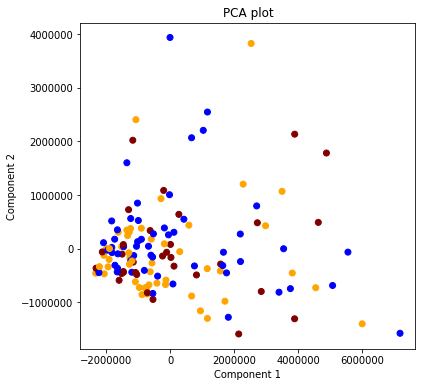

In [52]:
pca = PCA(n_components=2)
pca_vals = pca.fit_transform(full_df.drop('tumor_stage', axis=1))

cmapping = full_df['tumor_stage'].str.replace('iii', 'orange') \
    .str.replace('ii', 'maroon') \
    .str.replace('i', 'blue') \
    .values
    
fig = plt.figure(figsize=(6,6))
plt.scatter(pca_vals[:,0], pca_vals[:,1], c=cmapping)
plt.title('PCA plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2');

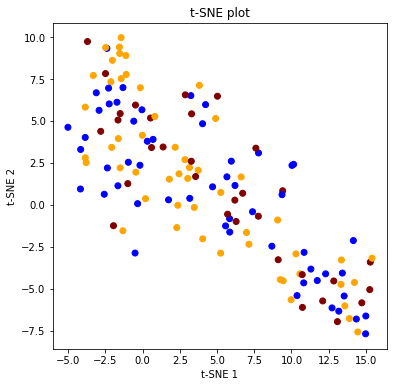

In [49]:
tsne = TSNE(n_components=2)
tsne_vals = tsne.fit_transform(full_df.drop('tumor_stage', axis=1))

cmapping = full_df['tumor_stage'].str.replace('iii', 'orange') \
    .str.replace('ii', 'maroon') \
    .str.replace('i', 'blue') \
    .values
    
fig = plt.figure(figsize=(6,6))
plt.scatter(tsne_vals[:,0], tsne_vals[:,1], c=cmapping)
plt.title('t-SNE plot')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2');

## Processed df

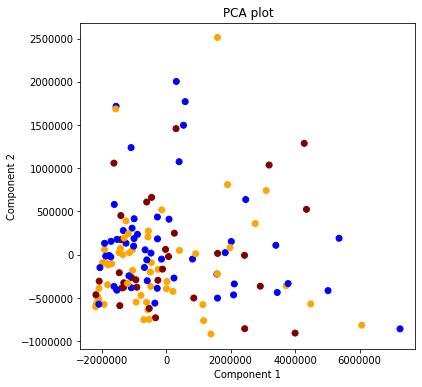

In [88]:
pca = PCA(n_components=2)
pca_vals = pca.fit_transform(processed_df)

cmapping = full_df['tumor_stage'].str.replace('iii', 'orange') \
    .str.replace('ii', 'maroon') \
    .str.replace('i', 'blue') \
    .values
    
fig = plt.figure(figsize=(6,6))
plt.scatter(pca_vals[:,0], pca_vals[:,1], c=cmapping)
plt.title('PCA plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2');

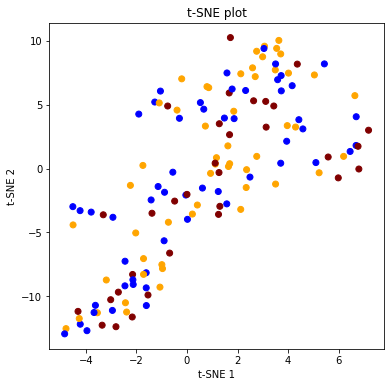

In [89]:
tsne = TSNE(n_components=2)
tsne_vals = tsne.fit_transform(processed_df)

cmapping = full_df['tumor_stage'].str.replace('iii', 'orange') \
    .str.replace('ii', 'maroon') \
    .str.replace('i', 'blue') \
    .values
    
fig = plt.figure(figsize=(6,6))
plt.scatter(tsne_vals[:,0], tsne_vals[:,1], c=cmapping)
plt.title('t-SNE plot')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2');

In [58]:
spca = MiniBatchSparsePCA(n_components=10)
full_df_spca = spca.fit_transform(full_df.drop('tumor_stage', axis=1))

/Users/mattheweng/Desktop/Galvanize/Projects/hacknights/env-tcga/lib/python3.6/site-packages/sklearn/decomposition/sparse_pca.py:388: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


## Semi-supervised clustering of patient samples

In [54]:
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

In [55]:
lp = LabelPropagation()
lp.fit()

## Supervised learning for tumor stage imputation

We'll be investigating how gene expression varies based on tumor stage. We can subset and filter out any lowly-expressed genes, genes that haven't been identified as being significant within the [Hallmarks of Cancer](http://software.broadinstitute.org/gsea/msigdb/search.jsp), and genes that have shown high variation within our samples.

Let's start by generating a Random Forest model, since we're interested in the gene signature that may be responsible for progressing tumor stage.

An example of how models can be used to identify genes of interest can be found in [Wenrick and Shemirani, 2018](https://www.frontiersin.org/articles/10.3389/fgene.2018.00297/full) and [Rendleman et al, 2019](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-2929-8)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

Perform a grid search of params for random forest classifier with the full set of sample data

In [51]:
X, y = full_df.drop('tumor_stage', axis=1), full_df['tumor_stage']
X_train, y_train, x_test, y_test = train_test_split(X, y, test_size=0.3)

rf = RandomForestClassifier()

params = {'n_estimators': [10,100,300], 
          'min_samples_split': [2,4, 8],
          'min_samples_leaf': [1, 3, 6],
          'min_weight_fraction_leaf': [0.0],
          'max_features': ['auto'],
          'max_leaf_nodes': [None],
         }
clf = GridSearchCV(rf, params)
clf.fit(X, y)

/Users/mattheweng/Desktop/Galvanize/Projects/hacknights/env-tcga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mattheweng/Desktop/Galvanize/Projects/hacknights/env-tcga/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [52]:
clf.best_score_

0.4172661870503597

In [53]:
clf.best_params_

{'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10}

Let's try the pre-processed data now...

In [33]:
X, y = processed_df, full_df['tumor_stage']
X_train, y_train, x_test, y_test = train_test_split(X, y, test_size=0.3)

rf = RandomForestClassifier()

params = {'n_estimators': [10,100,1000], 
          'min_samples_split': [2,4],
          'min_samples_leaf': [1, 3],
          'min_weight_fraction_leaf': [0.0],
          'max_features': ['auto'],
          'max_leaf_nodes': [None],
         }
clf = GridSearchCV(rf, params)
clf.fit(X, y)

/Users/mattheweng/Desktop/Galvanize/Projects/hacknights/env-tcga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mattheweng/Desktop/Galvanize/Projects/hacknights/env-tcga/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [34]:
clf.best_score_

0.4316546762589928

Try using SPCA to reduce the feature set further

In [37]:
spca = MiniBatchSparsePCA(n_components=10)
processed_df_spca = spca.fit_transform(processed_df)

/Users/mattheweng/Desktop/Galvanize/Projects/hacknights/env-tcga/lib/python3.6/site-packages/sklearn/decomposition/sparse_pca.py:388: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


In [49]:
X, y = processed_df_spca, full_df['tumor_stage']
X_train, y_train, x_test, y_test = train_test_split(X, y, test_size=0.3)

rf = RandomForestClassifier()

params = {'n_estimators': [10,100,200], 
          'min_samples_split': [4, 8],
          'min_samples_leaf': [1, 3, 6],
          'min_weight_fraction_leaf': [0.0],
          'max_features': ['auto'],
          'max_leaf_nodes': [None],
         }
clf = GridSearchCV(rf, params)
clf.fit(X, y)
clf.best_score_

/Users/mattheweng/Desktop/Galvanize/Projects/hacknights/env-tcga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mattheweng/Desktop/Galvanize/Projects/hacknights/env-tcga/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.3381294964028777

In [50]:
clf.best_params_

{'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100}

We can try taking the genes with the highest variation...

In [63]:
genes_highest_var = processed_df.var().sort_values()[:100].index

X, y = processed_df[genes_highest_var], full_df['tumor_stage']

rf = RandomForestClassifier()

params = {'n_estimators': [10,100,200], 
          'min_samples_split': [4, 8],
          'min_samples_leaf': [1, 3, 6],
          'min_weight_fraction_leaf': [0.0],
          'max_features': ['auto'],
          'max_leaf_nodes': [None],
         }
clf = GridSearchCV(rf, params)
clf.fit(X, y)
clf.best_score_

/Users/mattheweng/Desktop/Galvanize/Projects/hacknights/env-tcga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mattheweng/Desktop/Galvanize/Projects/hacknights/env-tcga/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.4316546762589928

In [64]:
clf.best_params_

{'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10}